In [1]:
# Import key library functions needed.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

# Load the data.
cars = pd.read_csv('./data/cars.csv')
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [2]:
# Get all non-MPG columns for the features.
data_x = cars[list(cars)[1:]]

# Get MPG as teh target variable.
data_y = cars['mpg']

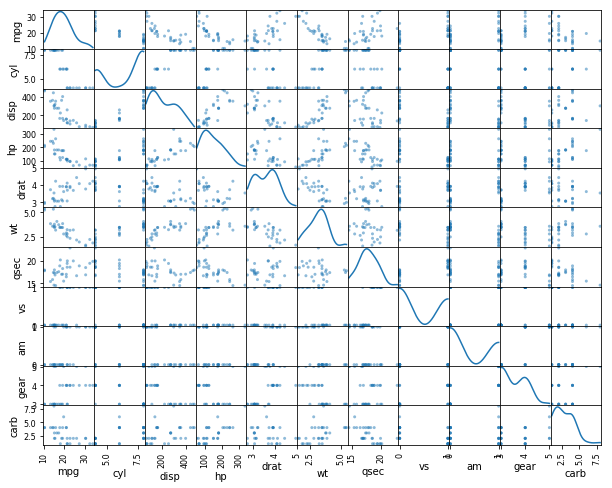

In [3]:
# Do a pairs plot to see potential relationships.

plt.rcParams['figure.figsize'] = [10, 8]

sm = pd.plotting.scatter_matrix(cars, diagonal="kde")
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

# Look at different feature sets to see how well they predict MPG.
feats_1 = ['hp']
feats_2 = ['hp','wt','drat']
feats_3 = ['hp','wt','cyl']
feats_4 = list(x_train)

feature_sets_to_try = [feats_1, feats_2, feats_3, feats_4]


### Make a single, simple linear regression model to illlustrate basic workflow.

In [5]:
model = linear_model.LinearRegression() # Construct model object
model.fit(x_train, y_train) # Fit the model (Using all features - AKA model 4)
preds = model.predict(x_test) # Build predictions on the test data

# Look at actual vs. predicted values:
print(pd.DataFrame({'Actual':y_test, 'Predicted':preds}))

# Look at error metrics:
print('MSE, MAE, R^2, EVS: ' + str([mean_squared_error(y_test, preds),
                                    median_absolute_error(y_test, preds),
                                    r2_score(y_test, preds),
                                    explained_variance_score(y_test, preds)]))


    Actual  Predicted
20    21.5  25.161462
15    10.4   8.551049
17    32.4  25.465516
2     22.8  24.508777
11    16.4  12.012969
19    33.9  27.865780
16    14.7   7.763519
MSE, MAE, R^2, EVS: [24.514932931971277, 4.3870307737591077, 0.63438166914222816, 0.765696249158618]


### Look at effect of different feature sets on the quality of results

In [6]:
for f in feature_sets_to_try:
    model = linear_model.LinearRegression() # Construct model object
    model.fit(x_train[f], y_train) # Fit the model (Using all features - AKA model 4)
    preds = model.predict(x_test[f]) # Build predictions on the test data
    print('MSE, MAE, R^2, EVS for feature set ' + str(f) + ': ' + str([mean_squared_error(y_test, preds),
                                    median_absolute_error(y_test, preds),
                                    r2_score(y_test, preds),
                                    explained_variance_score(y_test, preds)]))

MSE, MAE, R^2, EVS for feature set ['hp']: [27.516685119002656, 1.5636219218266376, 0.58961321608071571, 0.61393262317726371]
MSE, MAE, R^2, EVS for feature set ['hp', 'wt', 'drat']: [19.884077563303741, 2.6279205403576356, 0.70344674123662809, 0.80466635465983993]
MSE, MAE, R^2, EVS for feature set ['hp', 'wt', 'cyl']: [18.816951600501145, 3.5280819067169773, 0.71936197194183005, 0.78694557333377968]
MSE, MAE, R^2, EVS for feature set ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']: [24.514932931971277, 4.3870307737591077, 0.63438166914222816, 0.765696249158618]
